## BOOMBIKES : BUILDING LINEAR REGRESSION MODEL

In [145]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [146]:
# Reading the dataset 
boom=pd.read_csv('day.csv')

In [147]:
boom.shape

(730, 16)

In [148]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [149]:
#Finding the number of null values in each column
boom.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### All the columns are non null

### Data Preprocessing

In [150]:
#Mapping variables season, month, weathersit, weekday to its values

boom['season']=boom.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom['mnth']=boom.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom['weathersit']=boom.weathersit.map({1: 'Clear',2:'Cloudy',3:'Light',4:'Heavy'})
boom['weekday']=boom.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [151]:
boom.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [152]:
#drop unnecessary columns
boom=boom.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


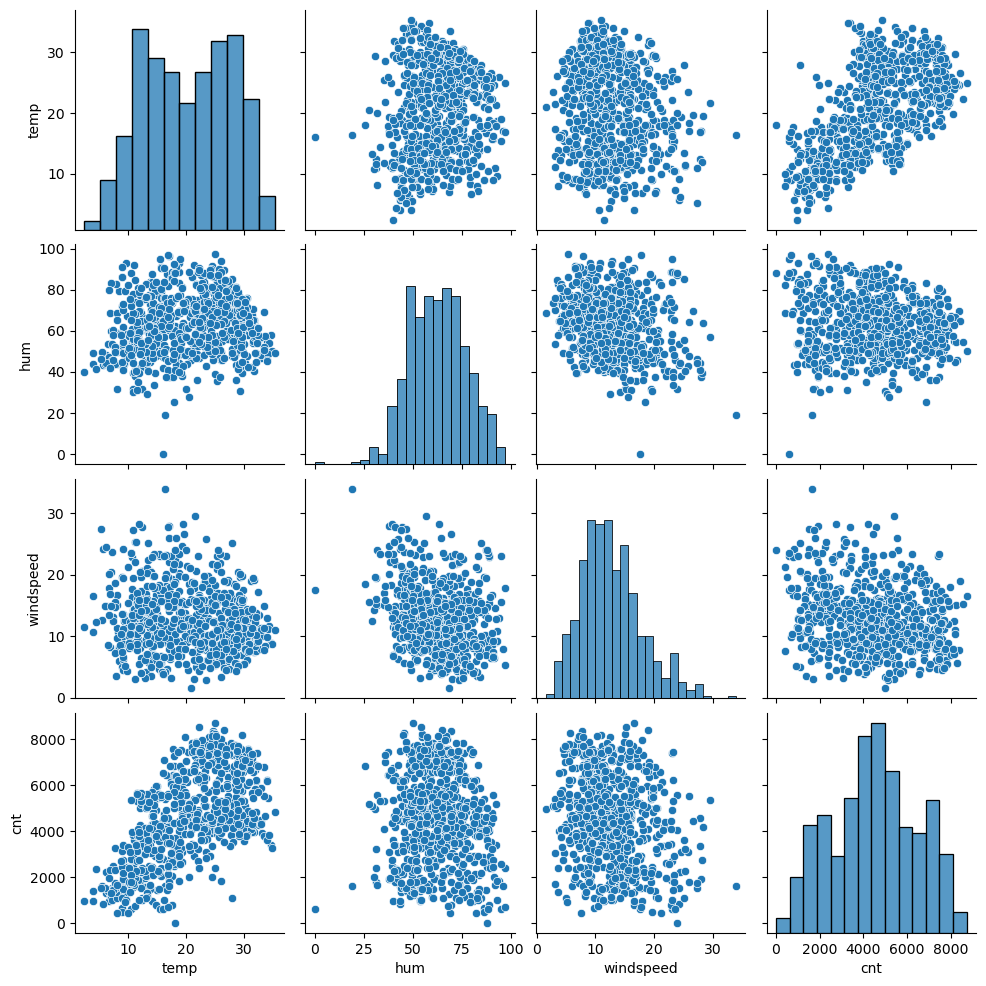

In [153]:
#Pairplot for numeric variables
sns.pairplot(boom, vars=["temp", "hum",'windspeed','cnt'])
plt.show()

#### Inference
##### Rentals are more when the temperature and humidity are high
##### Rentals are more when the windspeed is less.

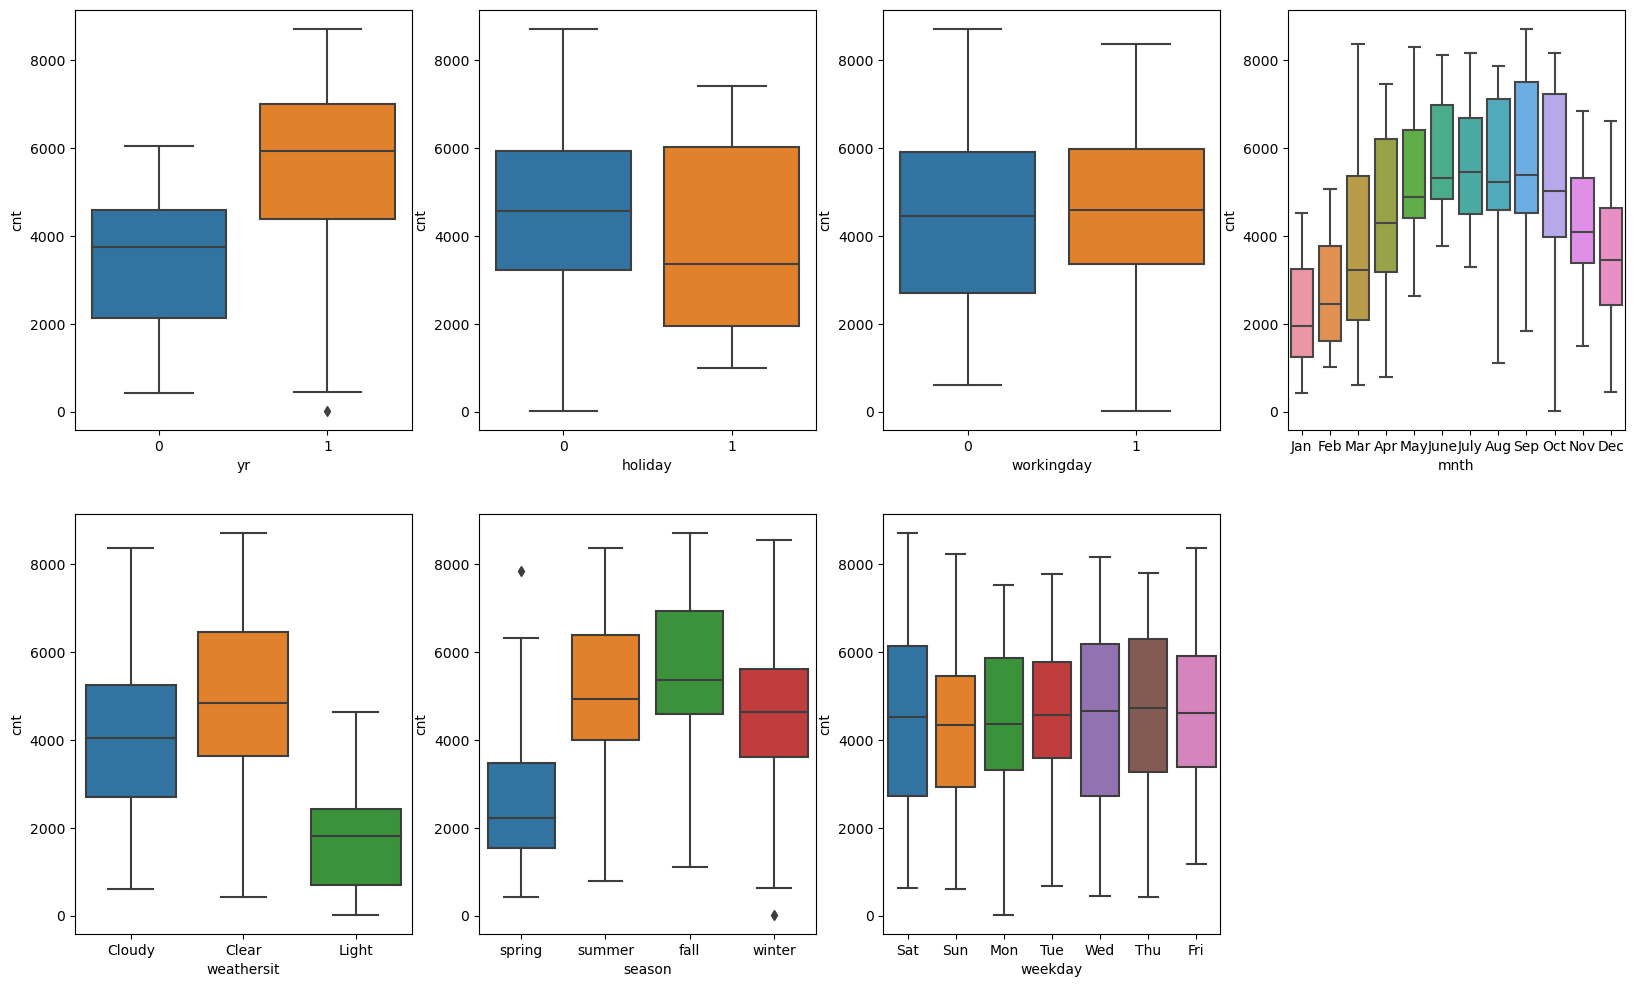

In [154]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = boom)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = boom)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom)
plt.show()

#### Inference 
##### Rentals are more in the year 2019 compared to2018.
##### Rentals are more during holiday
##### Rentals are more in the month of september or october
##### Rentals are more weather is clear or cloudy
##### Rentals are more during fall.
##### Rentals are more on saturdays and wednesdays 

C:\Users\91966\AppData\Local\Temp\ipykernel_4776\2806858277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(boom.corr(), annot = True)


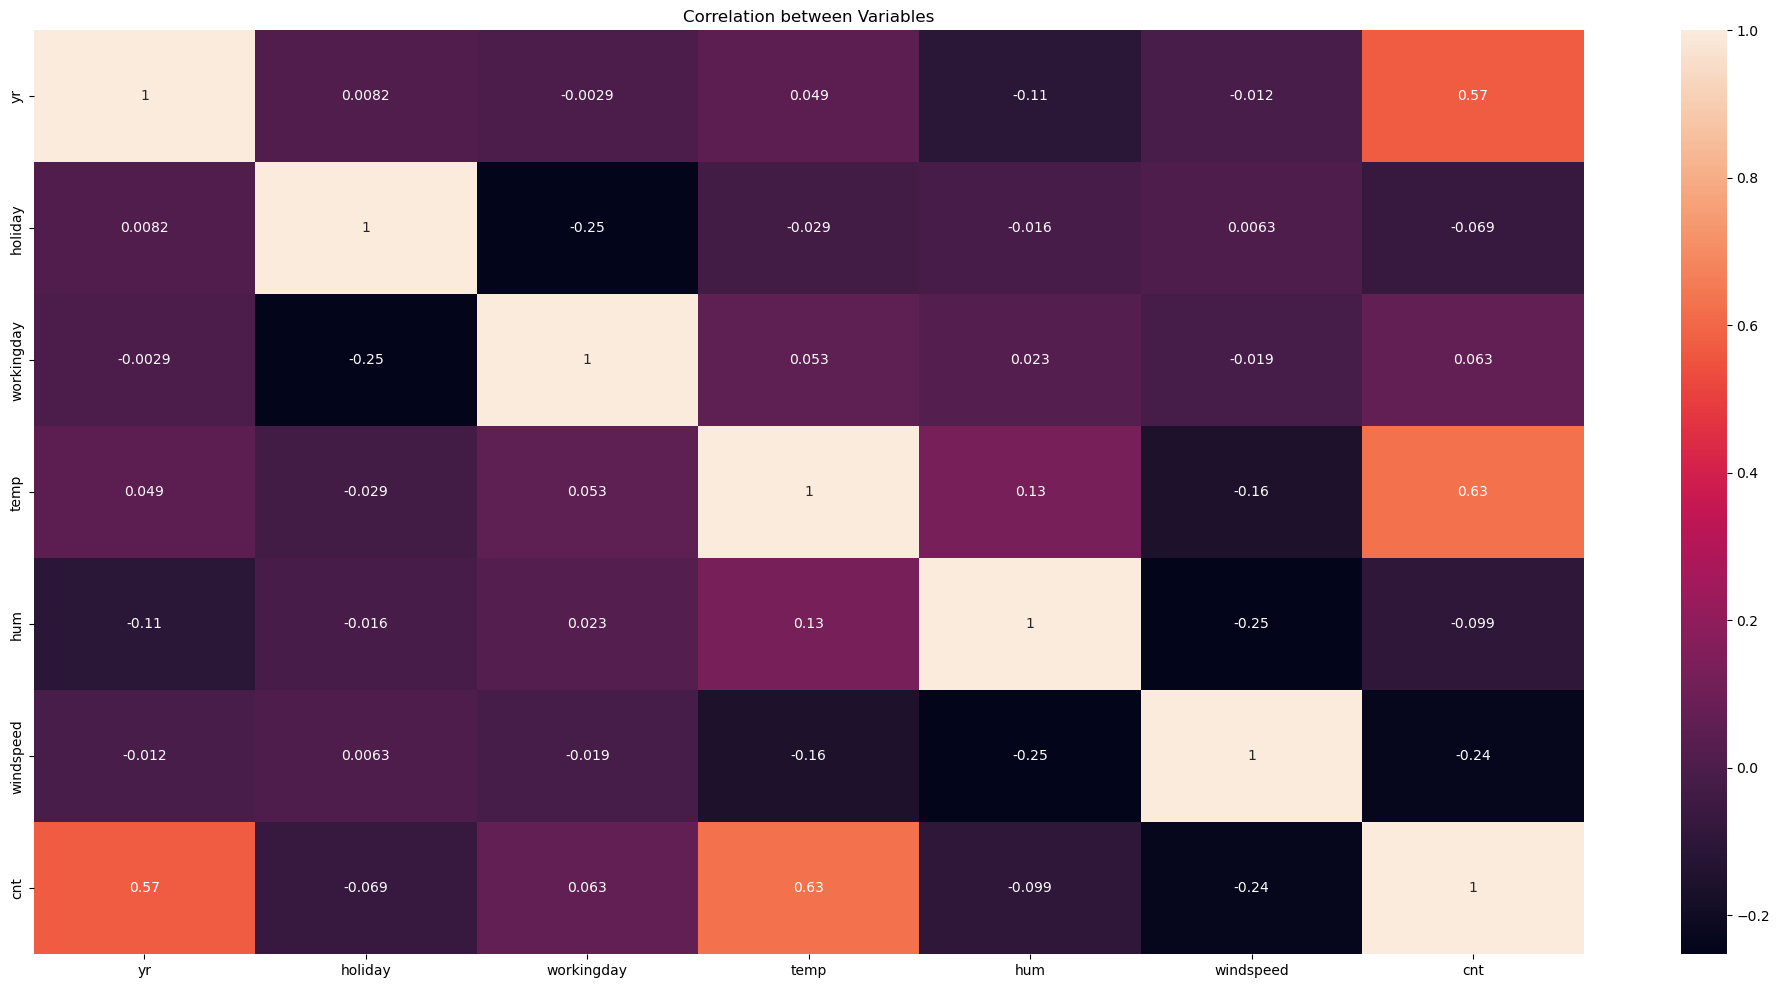

In [155]:
plt.figure(figsize=(25, 12))
sns.heatmap(boom.corr(), annot = True)
plt.title("Correlation between Variables")
plt.show()

#### Inference 
##### Temperature is highly correlated with the target variable.

In [156]:
# Giving dummy values for variables and dropping the first variable
months=pd.get_dummies(boom.mnth,drop_first=True)
weekdays=pd.get_dummies(boom.weekday,drop_first=True)
weather_sit=pd.get_dummies(boom.weathersit,drop_first=True)
seasons=pd.get_dummies(boom.season,drop_first=True)

In [157]:
boom=pd.concat([months,weekdays,weather_sit,seasons,boom],axis=1)
boom.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [158]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
boom.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boom.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


##### Dividing the dataset into training and test dataset

In [159]:
boom_train, boom_test = train_test_split(boom, train_size = 0.7, random_state = 100)

In [160]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
boom_train[num_vars] = scaler.fit_transform(boom_train[num_vars])
boom_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


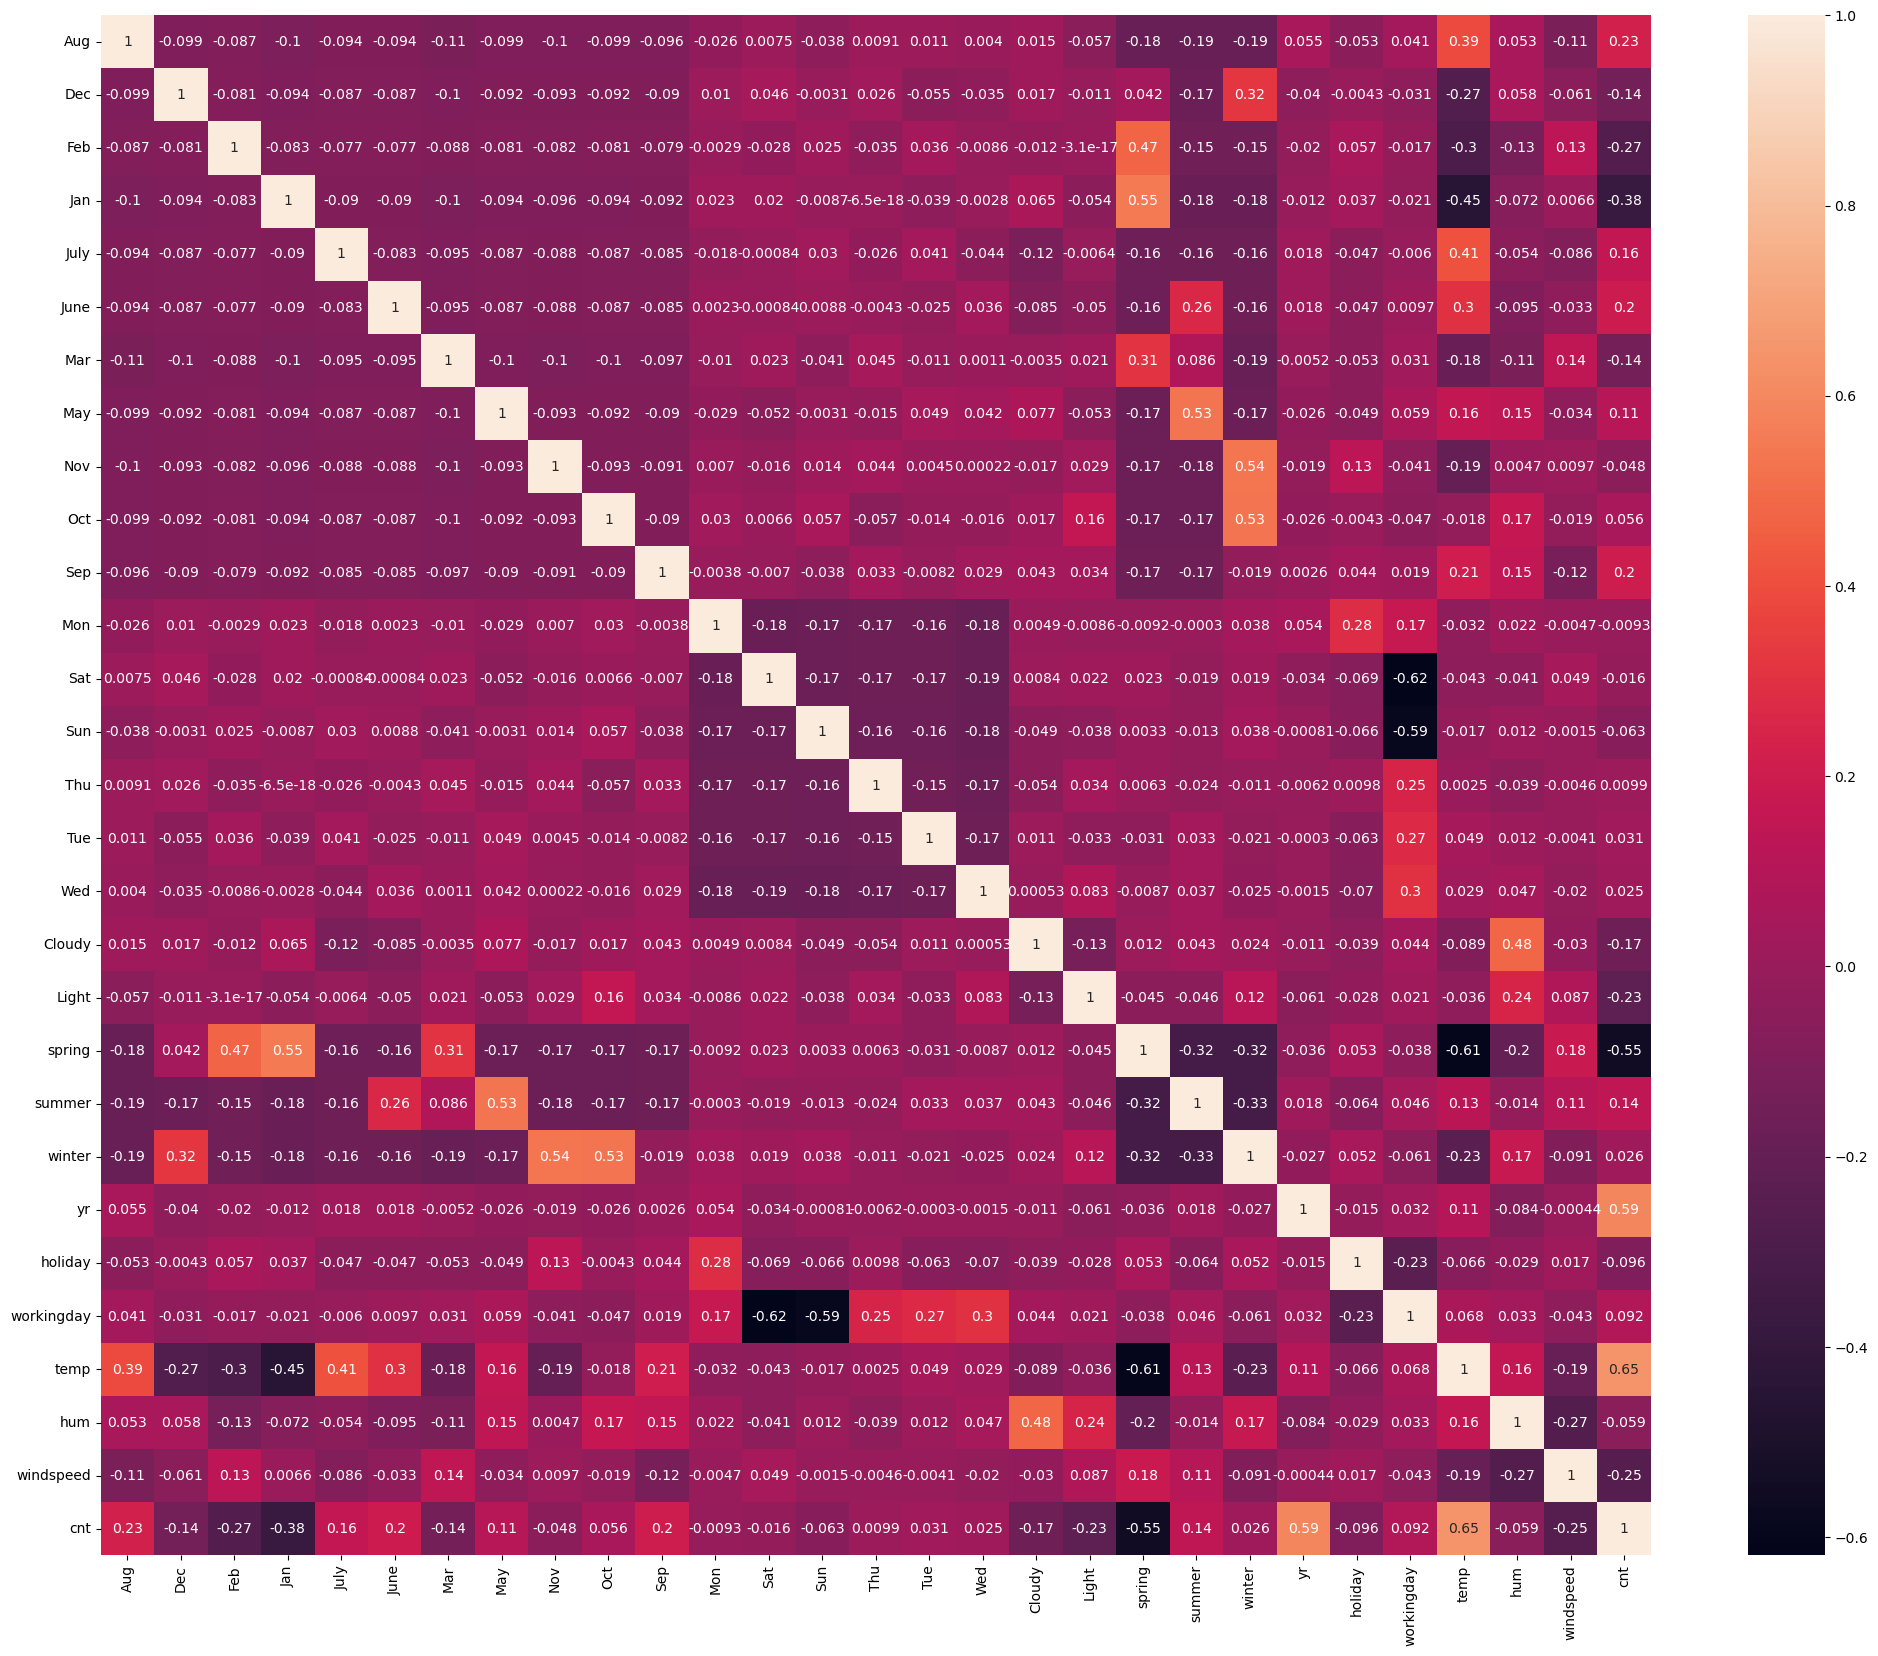

In [161]:
plt.figure(figsize=(25, 20))
sns.heatmap(boom_train.corr(),annot = True)
plt.show()

### Data Modelling

In [162]:
#Divide the data into X and y
y_train = boom_train.pop('cnt')
X_train = boom_train

In [163]:
# Extracting only the important features using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)


In [164]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 13),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Cloudy', True, 1),
 ('Light', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [165]:
# Extracted columns
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Cloudy', 'Light', 'spring', 'summer',
       'winter', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [166]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [167]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [168]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [169]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.22e-191
Time:                        11:56:07   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [170]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [171]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
4,Cloudy,2.29
9,yr,2.09
3,Sat,1.98


##### Dropping the Jan column as it it having the P value of 0.047

In [172]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [173]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        11:56:08   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.036      6.714      0.0

In [174]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
5,spring,4.24
7,winter,3.42
6,summer,2.85
3,Cloudy,2.29
8,yr,2.08
2,Sat,1.97


##### Dropping the humidity column as it having high VIF. VIF should be less than 5.

In [175]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.28e-188
Time:                        11:56:08   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.031      5.126      0.0

In [176]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
5,spring,2.49
6,summer,2.34
8,yr,2.07
7,winter,1.98
2,Sat,1.96
0,July,1.58
3,Cloudy,1.57


In [177]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.12e-189
Time:                        11:56:08   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

In [178]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,yr,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
3,Cloudy,1.57


In [179]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.94e-182
Time:                        11:56:08   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0989      0.030      3.248      0.0

In [180]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,temp,6.03
9,workingday,4.63
8,yr,2.07
6,summer,2.06
2,Sat,1.81
5,spring,1.78
7,winter,1.73
0,July,1.58
3,Cloudy,1.57
1,Sep,1.34


In [181]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.10e-182
Time:                        11:56:09   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0902      0.030      2.964      0.0

In [182]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,yr,2.07
1,Sat,1.81
5,summer,1.75
4,spring,1.70
6,winter,1.59
2,Cloudy,1.57
0,Sep,1.23
3,Light,1.07


In [183]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

C:\Users\91966\AppData\Local\Temp\ipykernel_4776\1830223346.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 25)


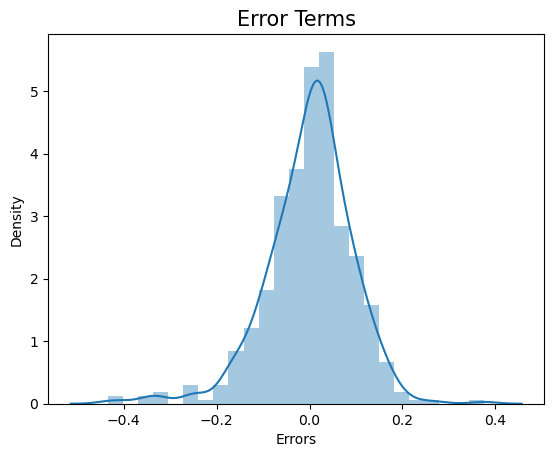

In [184]:
# Plot the histogram of the error terms

fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins = 25)
plt.title('Error Terms', fontsize = 15)                   
plt.xlabel('Errors', fontsize = 10)  
plt.show()

#### Feature Scaling

In [185]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
boom_test[num_vars] = scaler.transform(boom_test[num_vars])
boom_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [186]:
#Dividing into X_test and y_test
y_test = boom_test.pop('cnt')
X_test = boom_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Light,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.027273,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.163248,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


### Model Prediction

In [187]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Cloudy,Light,spring,summer,winter,yr,workingday,temp
184,1.0,0,0,1,0,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,0,1,0,0,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,1,0,0,1,0.817246


In [188]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Model Evaluation using r^2 and Adjusted r^2

In [189]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8115083592040953

In [190]:
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)


0.7905647777777778


### Insights
#### Features that were considered for predicting the sales are September, Saturday,Cloudy,Light,spring,summer,	winter,	year,	workingday and 	temperature.
#### Among these features temperature plays a major role.
#### 